In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
'''class — целевая переменная

cap-shape — форма шляпки

cap-surface — поверхность шляпки

cap-color — цвет шляпки

bruises — наличие повреждений (синяков)

odor — запах

gill-attachment — крепление пластинок к ножке

gill-spacing — расстояние между пластинками

gill-size — размер пластинок

gill-color — цвет пластинок

stalk-shape — форма ножки

stalk-root — корень ножки

stalk-surface-above-ring/stalk-surface-below-ring — поверхность ножки выше/ниже кольца

stalk-color-above-ring/stalk-color-below-ring — цвет ножки выше/ниже кольца.

veil-type — тип покрывала

veil-color — цвет покрывала.

ring-number — количество колец

ring-type — тип кольца

spore-print-color — цвет спорового отпечатка 

population — распространённость

habitat — место произрастания'''

'class — целевая переменная\n\ncap-shape — форма шляпки\n\ncap-surface — поверхность шляпки\n\ncap-color — цвет шляпки\n\nbruises — наличие повреждений (синяков)\n\nodor — запах\n\ngill-attachment — крепление пластинок к ножке\n\ngill-spacing — расстояние между пластинками\n\ngill-size — размер пластинок\n\ngill-color — цвет пластинок\n\nstalk-shape — форма ножки\n\nstalk-root — корень ножки\n\nstalk-surface-above-ring/stalk-surface-below-ring — поверхность ножки выше/ниже кольца\n\nstalk-color-above-ring/stalk-color-below-ring — цвет ножки выше/ниже кольца.\n\nveil-type — тип покрывала\n\nveil-color — цвет покрывала.\n\nring-number — количество колец\n\nring-type — тип кольца\n\nspore-print-color — цвет спорового отпечатка \n\npopulation — распространённость\n\nhabitat — место произрастания'

In [ ]:
'''Будет решаться бинарная классификация, так так у нас один целевой признак - class'''

In [5]:
df_no_duplicates = df.drop_duplicates()
print(f'До: {df.shape[0]} \nПосле: {df_no_duplicates.shape[0]}')

До: 8124 
После: 8124


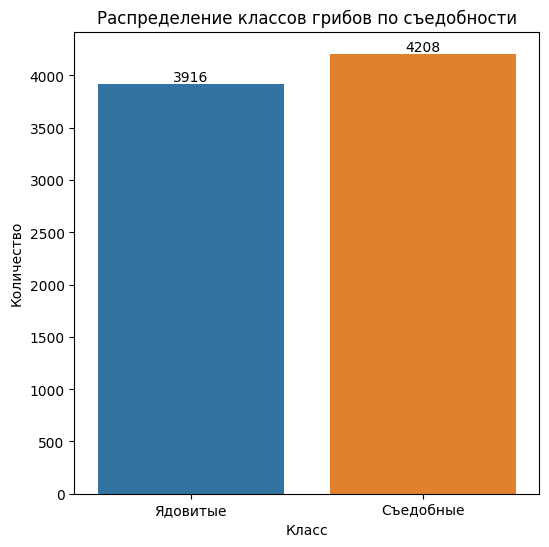

In [6]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='class', hue='class')
plt.title('Распределение классов грибов по съедобности')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(['p', 'e'], ['Ядовитые', 'Съедобные'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')
plt.show()

In [7]:
df['bruises'] = np.where(df['bruises'] == 't', 1, 0)

In [8]:
df['ring-number'] = df['ring-number'].replace({'n': 0, 'o': 1, 't': 2})

C:\Users\redmi\AppData\Local\Temp\ipykernel_4768\3603295962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ring-number'] = df['ring-number'].replace({'n': 0, 'o': 1, 't': 2})


In [9]:
df = df.rename(columns={'class': 'not_poison'})
df['not_poison'] = np.where(df['not_poison'] == 'e', 1, 0)

In [10]:
df.head()

,not_poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,1,p,f,c,n,k,...,s,w,w,p,w,1,p,k,s,u
1,1,x,s,y,1,a,f,c,b,k,...,s,w,w,p,w,1,p,n,n,g
2,1,b,s,w,1,l,f,c,b,n,...,s,w,w,p,w,1,p,n,n,m
3,0,x,y,w,1,p,f,c,n,n,...,s,w,w,p,w,1,p,k,s,u
4,1,x,s,g,0,n,f,w,b,k,...,s,w,w,p,w,1,e,n,a,g


In [11]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()

object_cols = df_label.select_dtypes(include=['object']).columns
for col in object_cols:
    df_label[col] = df_label[col].astype(str)

le = LabelEncoder()
for col in object_cols:
    df_label[col] = le.fit_transform(df_label[col])

print(df_label.dtypes)

not_poison                  int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


In [12]:
df_label.head()

,not_poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


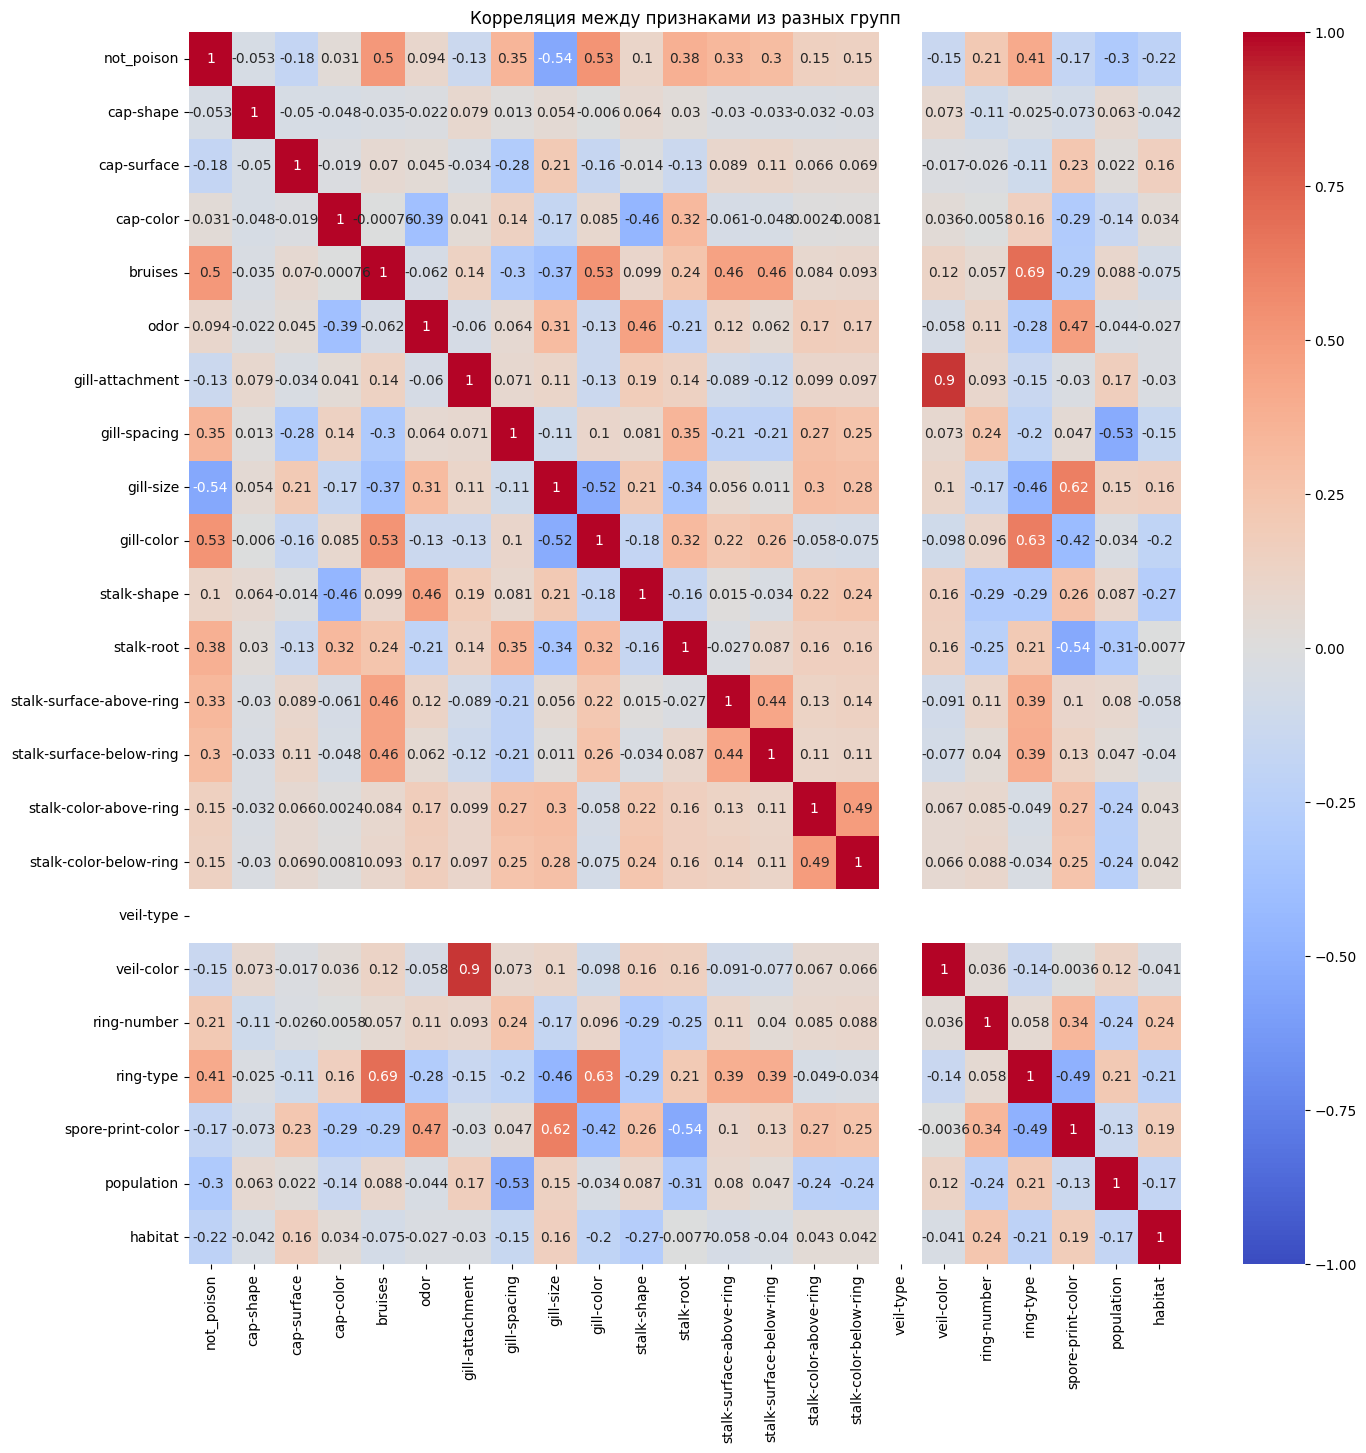

In [13]:
cols = df_label.columns

corr_matrix = df_label[cols].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между признаками из разных групп')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

X = df_label.drop('not_poison', axis=1)
y = df_label['not_poison']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(
    n_neighbors=5,           
    metric='hamming',        
    weights='distance'       
)


knn.fit(X_train, Y_train)
Y_proba = knn.predict_proba(X_test)[:, 1] 

roc_auc = roc_auc_score(Y_test, Y_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

ROC-AUC: 1.000


In [15]:
'Выбираем ROC'

'Выбираем ROC'

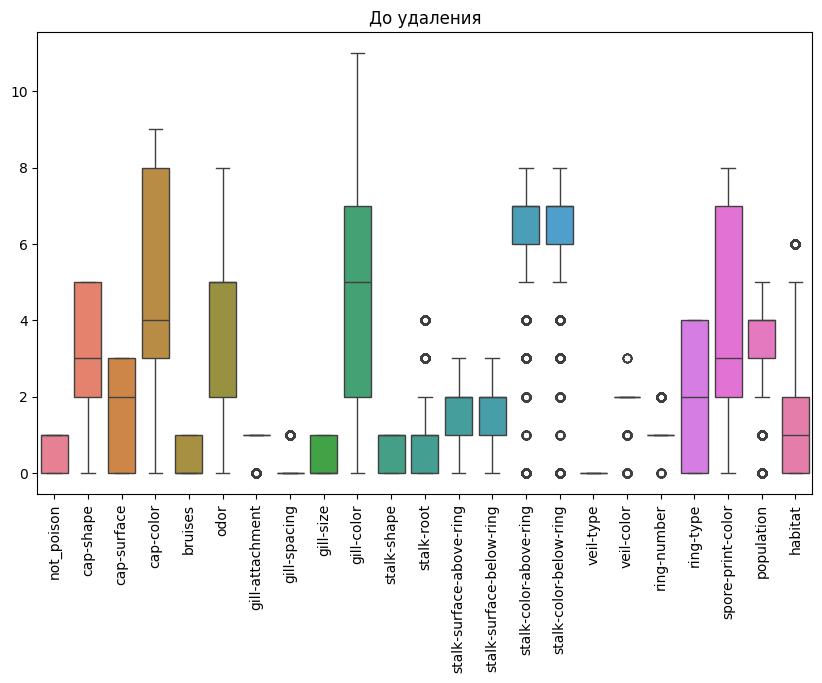

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_label)
plt.title('До удаления')
plt.xticks(rotation=90)
plt.show()

In [17]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
numeric_cols = df_label.columns.tolist()

df_clean = df_label.copy()
for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

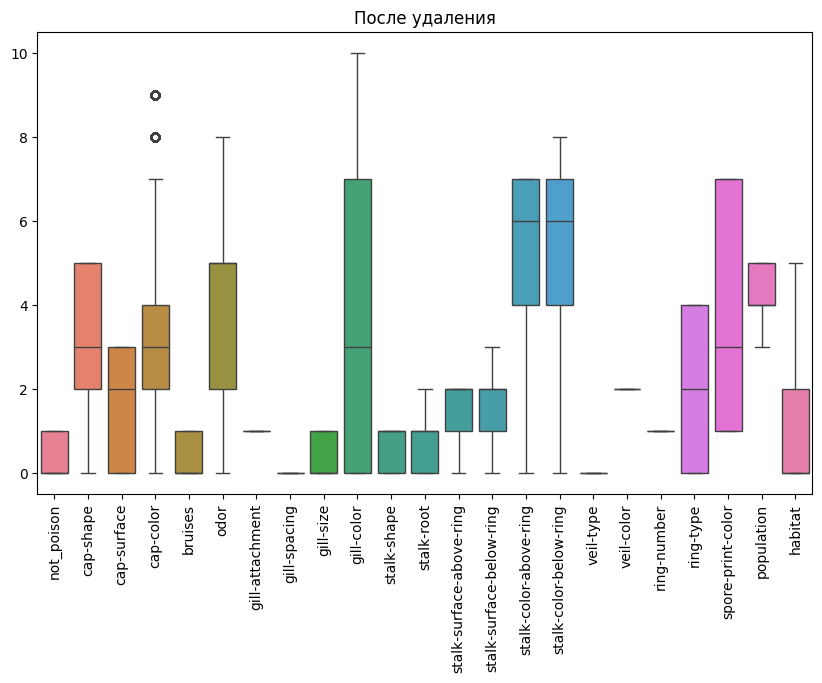

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)
plt.title('После удаления')
plt.xticks(rotation=90)
plt.show()

In [19]:
print(df.dtypes)

not_poison                   int64
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                      int64
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                  int64
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [24]:
print("Количество пропусков до заполнения:")
print(df.isnull().sum())

Количество пропусков до заполнения:
not_poison                  0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [23]:
'''Пропусков нету'''

'Пропусков нету'

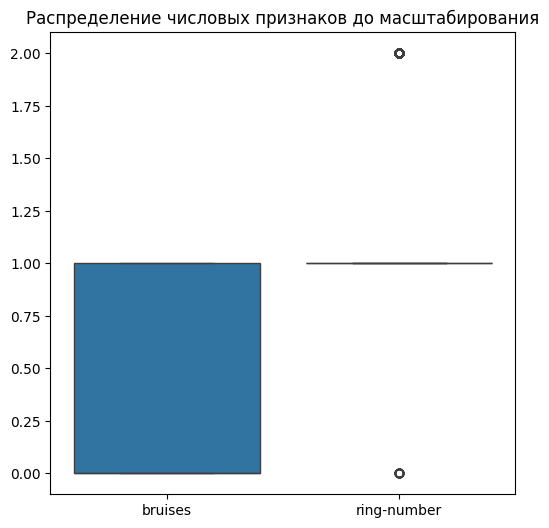

In [27]:
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
if 'not_poison' in numeric_cols:
    numeric_cols.remove('not_poison')

plt.figure(figsize=(6, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Распределение числовых признаков до масштабирования')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

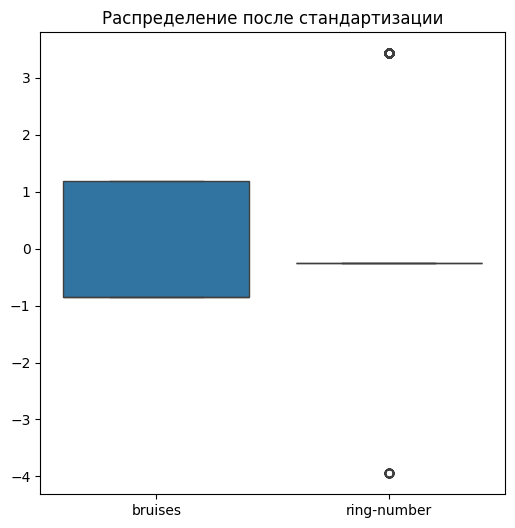

In [29]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_scaled[numeric_cols])
plt.title(f'Распределение после {"стандартизации" if isinstance(scaler, StandardScaler) else "нормализации"}')
plt.show()

In [33]:
catigory_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Категориальные признаки: {catigory_cols}")
print(f"Количество уникальных значений:\n{df[catigory_cols].nunique()}")

Категориальные признаки: ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
Количество уникальных значений:
cap-shape                    6
cap-surface                  4
cap-color                   10
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-type                    5
spore-print-color            9
population                   6
habitat            

In [36]:
'''Так как достаточно много уникальных признаков в нескольких столбцах, лучше будет использовать Label Encoder'''

'Так как достаточно много уникальных признаков в нескольких столбцах, лучше будет использовать Label Encoder'

In [34]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in catigory_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [35]:
df_encoded.head()

,not_poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [37]:
print(df_encoded.dtypes)

not_poison                  int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


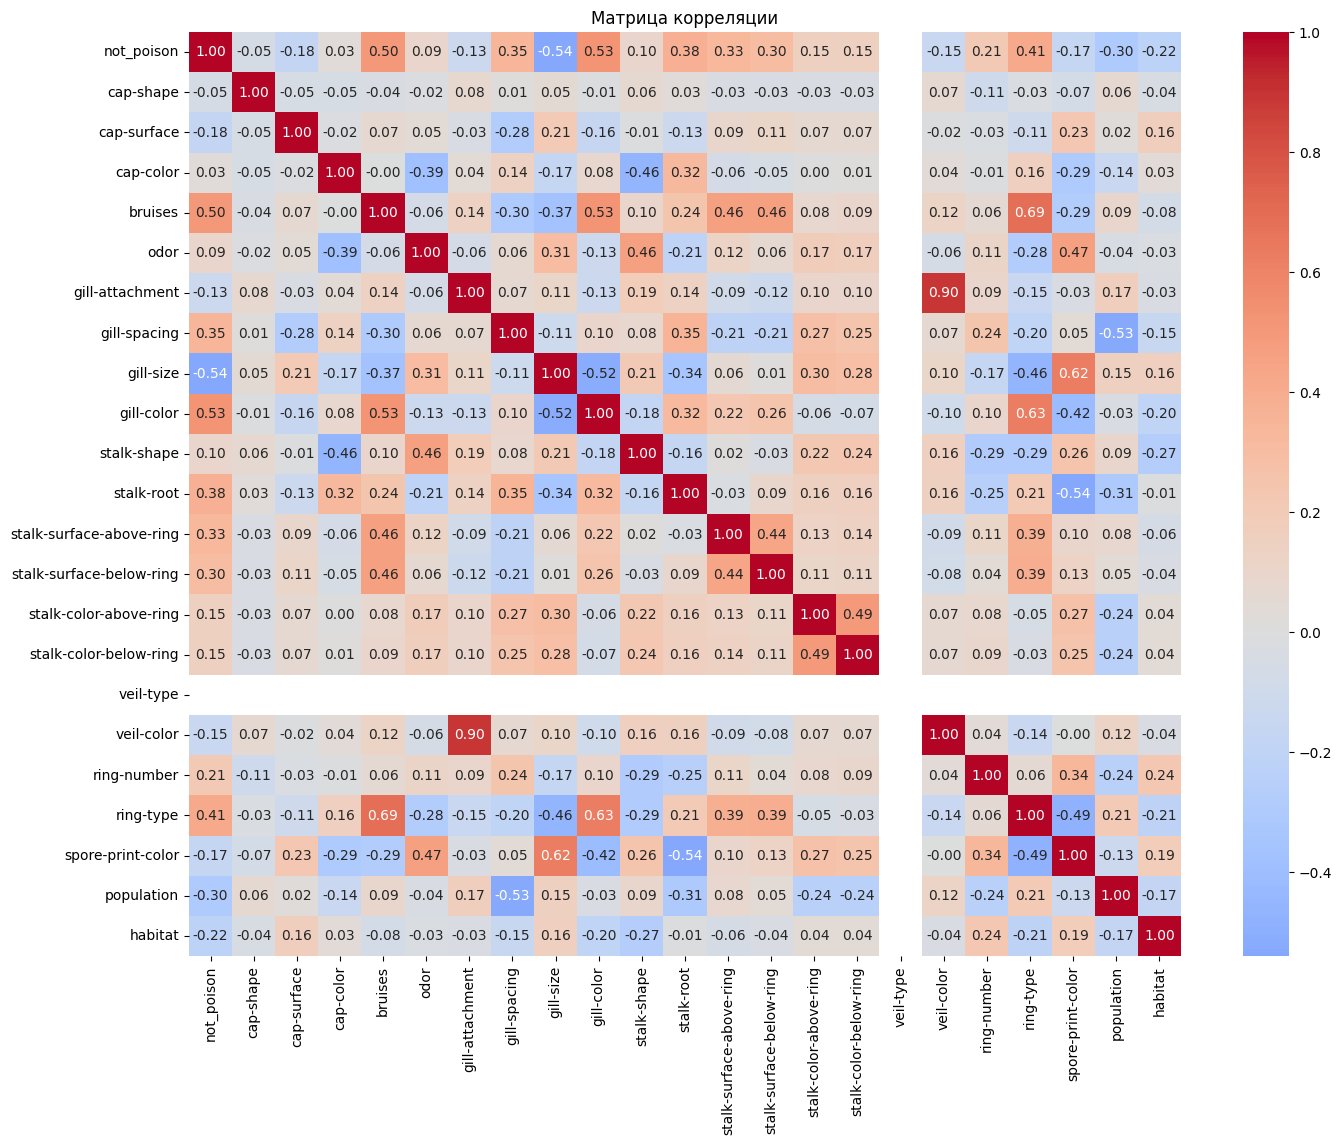

In [38]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0)
plt.title('Матрица корреляции')
plt.show()

In [41]:
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            col_name = corr_matrix.columns[i]
            high_corr.add(col_name)
            print(f"Высокая корреляция между {corr_matrix.columns[j]} и {col_name}: {corr_matrix.iloc[i, j]:.2f}")

Высокая корреляция между gill-attachment и veil-color: 0.90


In [42]:
df_linear = df.drop(columns=high_corr)  
df_knn = df.copy()                      

print(f"Для линейного классификатора оставлено {len(df_linear.columns)} признаков")
print(f"Для KNN сохранено {len(df_knn.columns)} признаков")

Для линейного классификатора оставлено 22 признаков
Для KNN сохранено 23 признаков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises                   8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

In [57]:
X = df_label.drop('not_poison', axis=1)
Y = df_label['not_poison']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import Perceptron

perceptron_params = {
    'alpha': [0.0001, 0.001, 0.01],  
    'penalty': [None, 'l2', 'l1'],    
    'max_iter': [1000, 2000],         
    'tol': [1e-3, 1e-4]               
}

perceptron_grid = GridSearchCV(
    Perceptron(random_state=42),
    param_grid=perceptron_params,
    scoring='roc_auc',               
    cv=5,
    refit='roc_auc'                   
)

In [54]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='roc_auc',
    cv=5,
    refit='roc_auc'
)

In [55]:
'''Метрика выбиралась исходя из результатов выполнения пятого пункта задания. ROC'''

'Метрика выбиралась исходя из результатов выполнения пятого пункта задания. ROC'

In [63]:
perceptron_grid.fit(X_train_scaled, Y_train)
print(f"Лучшие параметры (Perceptron): {perceptron_grid.best_params_}")
print(f"ROC-AUC (train): {perceptron_grid.best_score_:.3f}")

knn_grid.fit(X_train_scaled, Y_train)
print(f"\nЛучшие параметры (KNN): {knn_grid.best_params_}")
print(f"ROC-AUC (train): {knn_grid.best_score_:.3f}")

Лучшие параметры (Perceptron): {'alpha': 0.0001, 'max_iter': 1000, 'penalty': None, 'tol': 0.001}
ROC-AUC (train): 0.974

Лучшие параметры (KNN): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
ROC-AUC (train): 1.000


Perceptron Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1181
           1       0.96      0.95      0.95      1257

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438


KNN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



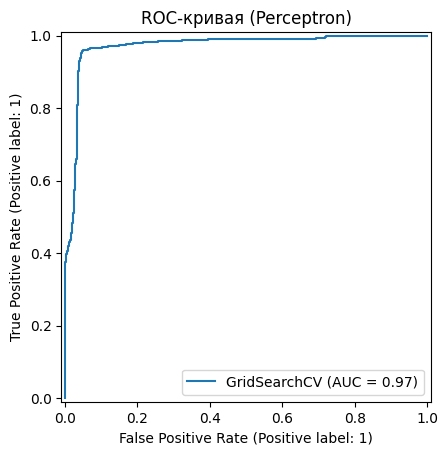

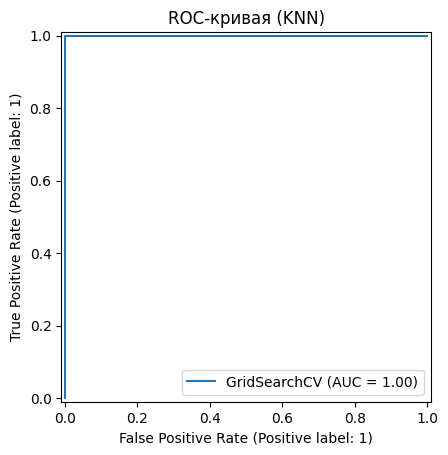

In [69]:
from sklearn.metrics import RocCurveDisplay, classification_report

# Перцептрон
y_pred_perceptron = perceptron_grid.predict(X_test_scaled)
print("Perceptron Report:")
print(classification_report(Y_test, y_pred_perceptron))
RocCurveDisplay.from_estimator(perceptron_grid, X_test_scaled, Y_test)
plt.title('ROC-кривая (Perceptron)')

# KNN
y_pred_knn = knn_grid.predict(X_test_scaled)
print("\nKNN Report:")
print(classification_report(Y_test, y_pred_knn))
RocCurveDisplay.from_estimator(knn_grid, X_test_scaled, Y_test)
plt.title('ROC-кривая (KNN)')
plt.show()

In [72]:
perceptron_params_no_reg = {
    'alpha': [0.0001, 0.001, 0.01],  
    'penalty': [None],               
    'max_iter': [1000, 2000],         
    'tol': [1e-3, 1e-4]               
}

perceptron_grid_no_reg = GridSearchCV(
    Perceptron(random_state=42),
    param_grid=perceptron_params_no_reg,
    scoring='roc_auc',               
    cv=5,
    refit='roc_auc'                   
)

In [74]:
print("С регуляризацией (l1/l2):")
print("Лучший ROC-AUC:", perceptron_grid.best_score_)

perceptron_grid_no_reg.fit(X, y)
print("\nБез регуляризации:")
print("Лучший ROC-AUC:", perceptron_grid_no_reg.best_score_)

С регуляризацией (l1/l2):
Лучший ROC-AUC: 0.9740880253660829

Без регуляризации:
Лучший ROC-AUC: 0.8212520468775665


In [75]:
'''С регуляцией l1, l2 результат оказался гораздо лучше
При его использовании показатель близок к идеальному'''

'С регуляцией l1, l2 результат оказался гораздо лучше\nПри его использовании показатель близок к идеальному'

In [ ]:
'''Классификатор К-ближайших соседей показал абсолютную точность, в то время как Персептрон был близок к идеалу.
По графикам выше заметно, что площать KNN больше чем у персептрона, что подтверждает вышесказанное.'''